In [127]:
# for working with data
import numpy as np
import pandas as pd
import ast
import statsmodels.api as sm
import pylab as pl

# basic plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import table


# # import the things we need from bokeh
# from bokeh.plotting import figure, save, show
# from bokeh.io import output_file, output_notebook
# from bokeh.models import ColumnDataSource
# # from bokeh.charts import Bar
# from bokeh.models import HoverTool
# from bokeh.models import (
#   GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
# )
# from bokeh.tile_providers import STAMEN_TONER
# from bokeh.models import LinearColorMapper, ColorBar, BasicTicker, ContinuousColorMapper, ContinuousTicker
# from bokeh.palettes import Blues as bpalette

# display graphs within the notebook
%matplotlib inline
# output_notebook()

In [65]:
diversity= pd.read_csv('Silicon Valley Diversity.csv')

sanity check the csv dataframe

In [66]:
diversity.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7
3,23andMe,2016,Latino,male,Technicians,0
4,23andMe,2016,Latino,male,Sales workers,0


In [67]:
diversity[diversity['count'].isin(['na'])].head()

,company,year,race,gender,job_category,count
11,23andMe,2016,Latino,male,Previous_totals,na
23,23andMe,2016,Latino,female,Previous_totals,na
35,23andMe,2016,White,male,Previous_totals,na
47,23andMe,2016,Black_or_African_American,male,Previous_totals,na
59,23andMe,2016,Native_Hawaiian_or_Pacific_Islander,male,Previous_totals,na


Clean the NAs to 0s on the count column

In [68]:
diversity['count'].fillna(0, inplace=True)
print(diversity[diversity['count'].isin(['na'])].head())

    company  year                                 race  gender  \
11  23andMe  2016                               Latino    male   
23  23andMe  2016                               Latino  female   
35  23andMe  2016                                White    male   
47  23andMe  2016            Black_or_African_American    male   
59  23andMe  2016  Native_Hawaiian_or_Pacific_Islander    male   

       job_category count  
11  Previous_totals    na  
23  Previous_totals    na  
35  Previous_totals    na  
47  Previous_totals    na  
59  Previous_totals    na  


We still have counts with 'na's!

In [69]:
diversity['count'] = diversity['count'].replace(['na'], 0)
print(diversity[diversity['count'].isin(['na'])].head())

Empty DataFrame
Columns: [company, year, race, gender, job_category, count]
Index: []


All cleaned! Finally!

In [70]:
diversity.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7
3,23andMe,2016,Latino,male,Technicians,0
4,23andMe,2016,Latino,male,Sales workers,0


In [71]:
# make sure count column are floats
diversity['count'] = diversity['count'].astype(float)
grouped = diversity.groupby('race')
print(grouped.agg({
    'count': 'sum'}))

                                         count
race                                          
American_Indian_Alaskan_Native          3530.0
Asian                                 276530.0
Black_or_African_American              52813.0
Latino                                 75442.0
Native_Hawaiian_or_Pacific_Islander     3165.0
Overall_totals                       1045284.0
Two_or_more_races                      16647.0
White                                 617157.0


In [72]:
pd.pivot_table(diversity, index=['race'], values='count', aggfunc=np.sum)

,count
race,
American_Indian_Alaskan_Native,3530.0
Asian,276530.0
Black_or_African_American,52813.0
Latino,75442.0
Native_Hawaiian_or_Pacific_Islander,3165.0
Overall_totals,1045284.0
Two_or_more_races,16647.0
White,617157.0


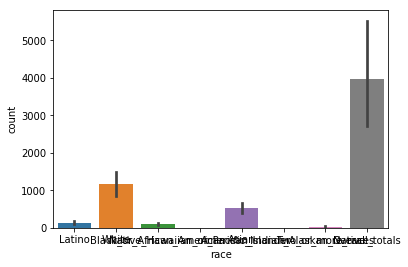

In [99]:
sns.barplot(y='count', x='race', data=diversity)
plt.show()

Overall_totals is messing things up! Let's build a new dataframe without it

In [100]:
race_count = pd.pivot_table(diversity, index=['race'], values='count', aggfunc=np.sum)
print(race_count)

                                         count
race                                          
American_Indian_Alaskan_Native          3530.0
Asian                                 276530.0
Black_or_African_American              52813.0
Latino                                 75442.0
Native_Hawaiian_or_Pacific_Islander     3165.0
Overall_totals                       1045284.0
Two_or_more_races                      16647.0
White                                 617157.0


In [101]:
print(list(race_count))

['count']


In [102]:
print(race_count.shape)

(8, 1)


let's drop the 8th row

In [103]:
race_count.columns.name = 'XX'
print(race_count)

XX                                       count
race                                          
American_Indian_Alaskan_Native          3530.0
Asian                                 276530.0
Black_or_African_American              52813.0
Latino                                 75442.0
Native_Hawaiian_or_Pacific_Islander     3165.0
Overall_totals                       1045284.0
Two_or_more_races                      16647.0
White                                 617157.0


In [105]:
print(race_count)

XX                                       count
race                                          
American_Indian_Alaskan_Native          3530.0
Asian                                 276530.0
Black_or_African_American              52813.0
Latino                                 75442.0
Native_Hawaiian_or_Pacific_Islander     3165.0
Overall_totals                       1045284.0
Two_or_more_races                      16647.0
White                                 617157.0


In [110]:
race_count = race_count[race_count['count'] != 1045284.0]

In [115]:
race_count

XX,count
race,
American_Indian_Alaskan_Native,3530.0
Asian,276530.0
Black_or_African_American,52813.0
Latino,75442.0
Native_Hawaiian_or_Pacific_Islander,3165.0
Two_or_more_races,16647.0
White,617157.0


In [121]:
print(list(race_count.index))

['American_Indian_Alaskan_Native', 'Asian', 'Black_or_African_American', 'Latino', 'Native_Hawaiian_or_Pacific_Islander', 'Two_or_more_races', 'White']


In [122]:
race_count['race_type'] = list(race_count.index)

In [123]:
race_count

XX,count,race_type
race,,
American_Indian_Alaskan_Native,3530.0,American_Indian_Alaskan_Native
Asian,276530.0,Asian
Black_or_African_American,52813.0,Black_or_African_American
Latino,75442.0,Latino
Native_Hawaiian_or_Pacific_Islander,3165.0,Native_Hawaiian_or_Pacific_Islander
Two_or_more_races,16647.0,Two_or_more_races
White,617157.0,White


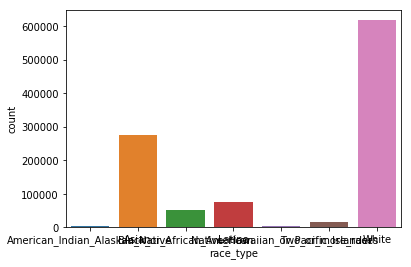

In [125]:
sns.barplot(y='count',x='race_type', data=race_count)
plt.show()

Still ugly, let's do a pie chart

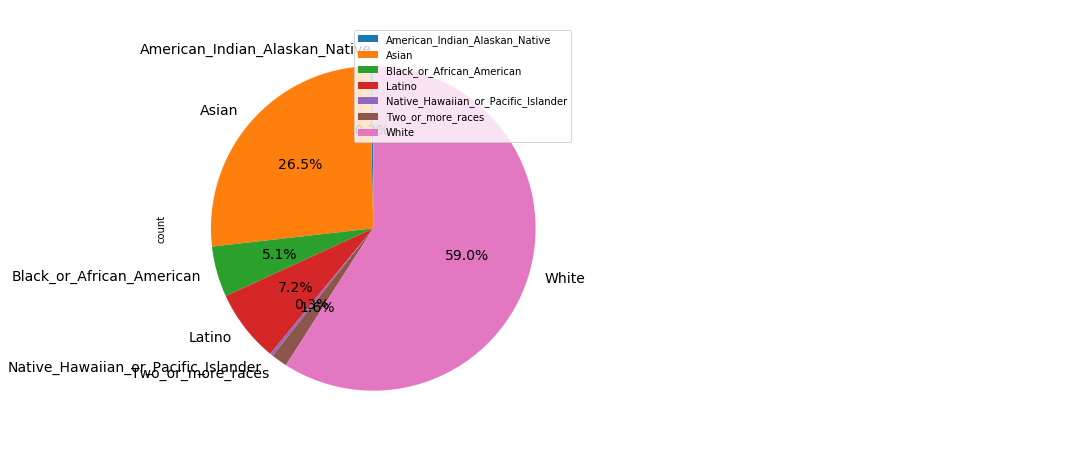

In [132]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
race_count.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=race_count['race_type'], legend = True, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
# tbl = table(ax2, race_count, loc='center')
# tbl.auto_set_font_size(False)
# tbl.set_fontsize(14)
plt.show()

In [3]:
df = pd.DataFrame(diversity, columns = ['company', 'race', 'gender', 'job_category', 'count'])
df.replace(["NaN", 'na'], np.nan, inplace = True)
df= df.dropna()


In [99]:
count2=pd.to_numeric(df['count'])
df2=df.join(count2)
df2

ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

In [103]:
sns.barplot(y='count2', x='race', data=df2)
plt.show()

ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

In [87]:
count2=pd.to_numeric(df['count'])
type(count2)

pandas.core.series.Series

In [92]:
pd.pivot_table(df2, index=['race'], values='value', aggfunc=np.sum)

,value
race,
American_Indian_Alaskan_Native,0010000000100000100001033020000086024000000065...
Asian,0523003000031162500700003915310673011580000112...
Black_or_African_American,0020000000200200100003026250263000080740918055...
Latino,0170000000801500500001135175033800001701410506...
Native_Hawaiian_or_Pacific_Islander,0000000000001000000001159003000018190430000000...
Two_or_more_races,0040000000403200500001006250105000046280713057...
White,9306100200001027183700220000845611971325074296...


In [91]:
race2= pd.get_dummies(df['race'], prefix='race')
gender2= pd.get_dummies(df['gender'], prefix='gender')
company2= pd.get_dummies(df['company'], prefix='company')
category=pd.get_dummies(df['job_category'], prefix='job_category')
count2=pd.to_numeric(df['count'])


In [102]:
new_df=['race2','gender2','company2','category','count2']
new_df

['race2', 'gender2', 'company2', 'category', 'count2']

In [101]:
logit = sm.Logit(diversity3['count2'], diversity3['race2','gender2,'company2','category'])

result = logit.fit()


SyntaxError: invalid syntax (<ipython-input-101-1078fd51419e>, line 1)